In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import nbformat

# Your notebook path in Colab
input_nb = '/content/drive/MyDrive/Colab Notebooks/Copy of final_yr.ipynb'
output_nb = '/content/drive/MyDrive/Colab Notebooks/preprocessing_github.ipynb'

# Read the notebook
with open(input_nb, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Remove the problematic metadata
if 'widgets' in nb['metadata']:
    del nb['metadata']['widgets']

# Save the cleaned notebook
with open(output_nb, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print(f"Cleaned notebook saved as: {output_nb}")


Cleaned notebook saved as: /content/drive/MyDrive/Colab Notebooks/preprocessing_github.ipynb


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from IPython.display import display, Markdown

# Set your project path
base_path = "/content/drive/MyDrive/clinicalimages"

# Excel paths
metadata_path = os.path.join(base_path, "metadata.xlsx")
imgtypes_path = os.path.join(base_path, "imgtypes.xlsx")

# Load spreadsheets
meta_df = pd.read_excel(metadata_path)
imgtypes_df = pd.read_excel(imgtypes_path)

# Clean up column names to avoid errors
meta_df.columns = meta_df.columns.str.strip()
imgtypes_df.columns = imgtypes_df.columns.str.strip()


In [ ]:
def display_case(case_folder):  # case_folder = "case198"
    print(f"📂 Searching in folder: {case_folder}")

    folder_path = os.path.join(base_path, case_folder)
    if not os.path.exists(folder_path):
        print("❌ Folder not found.")
        return

    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    if not image_files:
        print("⚠️ No images found in folder.")
        return

    # Extract case ID from first image filename (e.g., AAGU1.jpg → AAGU)
    first_image = image_files[0]
    case_id = ''.join([c for c in first_image if c.isalpha()])  # Remove digits to get case ID

    # Get metadata for this case
    case_row = meta_df[meta_df["CaseID"] == case_id]
    if case_row.empty:
        print("❌ Clinical data not found for Case ID:", case_id)
    else:
        display(Markdown(f"### 🧬 Clinical Metadata for **{case_id}**"))
        display(case_row.T)  # Transpose for better view

    # Display all images with type
    display(Markdown("### 🖼️ Case Images with Type"))
    for img_file in image_files:
        image_path = os.path.join(folder_path, img_file)

        # Get image type from imgtypes.xlsx
        img_type_row = imgtypes_df[imgtypes_df['File'].str.strip() == img_file.strip()]
        img_type = img_type_row['Type'].values[0] if not img_type_row.empty else "Type: Unknown"

        # Read and show image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.title(f"{img_file} — {img_type}")
        plt.axis('off')
        plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ Set paths
BASE_DIR = "/content/drive/MyDrive/clinicalimages"
METADATA_PATH = os.path.join(BASE_DIR, "metadata.xlsx")
IMGTYPE_PATH = os.path.join(BASE_DIR, "imgtypes.xlsx")

# ✅ Load spreadsheets
meta_df = pd.read_excel(METADATA_PATH, header=1)
imgtype_df = pd.read_excel(IMGTYPE_PATH)

# ✅ Clean column names
meta_df.columns = [str(c).strip() for c in meta_df.columns]
imgtype_df.columns = [str(c).strip() for c in imgtype_df.columns]

def display_case(case_folder):
    print(f"\n📂 Searching in folder: {case_folder}")

    folder_path = os.path.join(BASE_DIR, case_folder)
    if not os.path.exists(folder_path):
        print("❌ Folder not found.")
        return

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".png"))]
    if not image_files:
        print("⚠️ No images found.")
        return

    first_img = image_files[0]
    case_id = first_img[:4].strip().upper()
    print(f"🔍 Detected Case ID from filename: {case_id}")

    # Get clinical data
    if "CaseID" in meta_df.columns:
        case_row = meta_df[meta_df["CaseID"].astype(str).str.upper() == case_id]
    else:
        print("❌ 'CaseID' column not found.")
        return

    if case_row.empty:
        print("❌ Case ID not found in metadata.")
    else:
        from IPython.display import display
        print("\n📑 Clinical Metadata:\n")
        display(case_row.T)

    print("\n🖼️ Images and Types:\n")
    for img in image_files:
        img_path = os.path.join(folder_path, img)
        img_type = imgtype_df[imgtype_df["Image"] == img]["Type"].values
        img_type = img_type[0] if len(img_type) else "Unknown"

        print(f"📸 {img} - Type: {img_type}")
        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.title(f"{img} ({img_type})")
        plt.axis("off")
        plt.show()

# 🧪 Example usage
# display_case("Case 198")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ Path to your Drive folder
base_path = "/content/drive/MyDrive/clinicalimages"

# ✅ Load metadata and image types
metadata_path = os.path.join(base_path, "metadata.xlsx")
imgtypes_path = os.path.join(base_path, "imgtypes.xlsx")

# 🟢 Load spreadsheets (skip junk row)
meta_df = pd.read_excel(metadata_path, skiprows=1)
imgtype_df = pd.read_excel(imgtypes_path)

# ✅ Strip column names
meta_df.columns = [str(c).strip() for c in meta_df.columns]
imgtype_df.columns = [str(c).strip() for c in imgtype_df.columns]

def display_case(case_folder):
    folder_path = os.path.join(base_path, case_folder)
    print(f"\n📂 Searching in folder: {case_folder}")

    # 🔍 Get first image to extract Case ID
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
    if not image_files:
        print("❌ No images in folder.")
        return

    first_img = image_files[0]
    case_id = os.path.splitext(first_img)[0][:4].strip()
    print(f"🔍 Detected Case ID from filename: {case_id}")

    # 🔎 Search metadata for this CaseID
    if "CaseID" not in meta_df.columns:
        print("❌ 'CaseID' column not found in metadata.xlsx")
        return

    case_row = meta_df[meta_df["CaseID"].astype(str).str.strip() == case_id]

    if case_row.empty:
        print("❌ Case ID not found in metadata.")
    else:
        print("\n📑 Clinical Metadata:\n")
        display(case_row.transpose())

    # 🖼️ Show each image with its Type from imgtypes.xlsx
    print("\n🖼️ Images and Types:\n")
    for img in image_files:
        img_path = os.path.join(folder_path, img)

        # 🔍 Match filename in 'File' column
        match_row = imgtype_df[imgtype_df["File"] == img]
        img_type = match_row["Type"].values[0] if not match_row.empty else "Unknown"

        print(f"📸 {img} — Type: {img_type}")
        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.title(f"{img} ({img_type})")
        plt.axis("off")
        plt.show()



📂 Searching in folder: Case 198
🔍 Detected Case ID from filename: AAGU

📑 Clinical Metadata:



,197
Case Number,198
CaseID,AAGU
HPV,Negative
Adequacy,Adequate
Reason,NaN
Squamocolumnar junction visibility,Completely visible
Transformation zone,Type 1
Original squamous epithelium,Mature
Columnar epithelium,NaN
Metaplastic squamous epithelium,NaN



🖼️ Images and Types:

📸 AAGU1.jpg — Type: Speculum examination


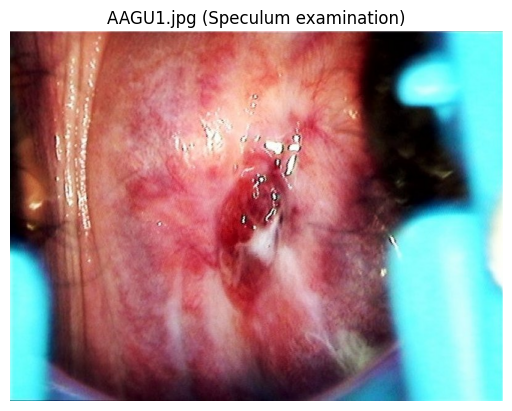

📸 AAGU3.jpg — Type: After normal saline


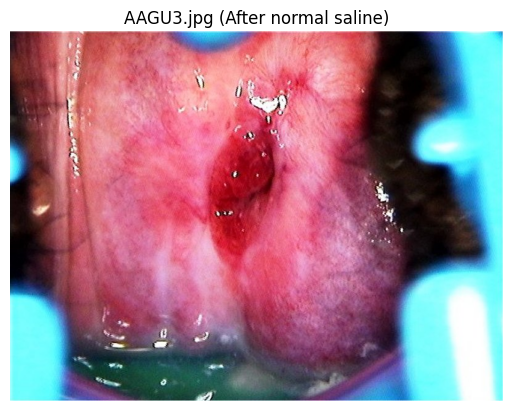

📸 AAGU4.jpg — Type: After normal saline with green filter


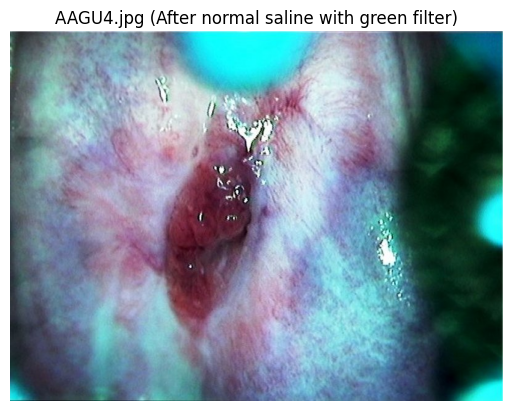

📸 AAGU6.jpg — Type: After acetic acid


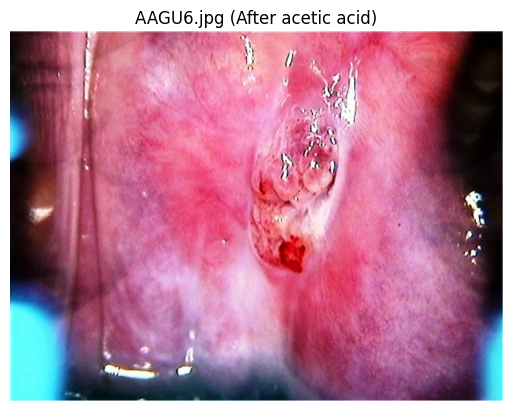

In [ ]:
display_case("Case 198")



📂 Searching in folder: Case 001
🔍 Detected Case ID from filename: AAAW

📑 Clinical Metadata:



,0
Case Number,1
CaseID,AAAW
HPV,Positive
Adequacy,Adequate
Reason,NaN
Squamocolumnar junction visibility,Completely visible
Transformation zone,Type 1
Original squamous epithelium,Mature
Columnar epithelium,Ectopy absent
Metaplastic squamous epithelium,Nabothian cysts



🖼️ Images and Types:

📸 AAAW1.jpg — Type: After normal saline


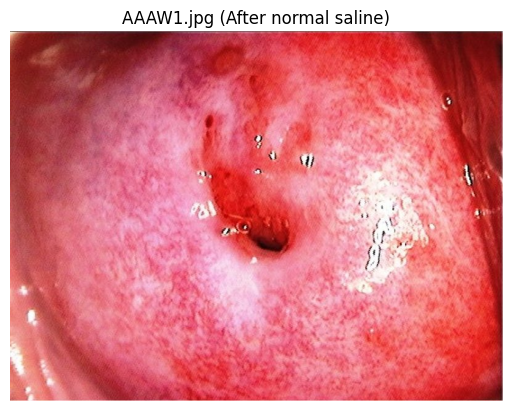

📸 AAAW2.jpg — Type: After acetic acid with green filter


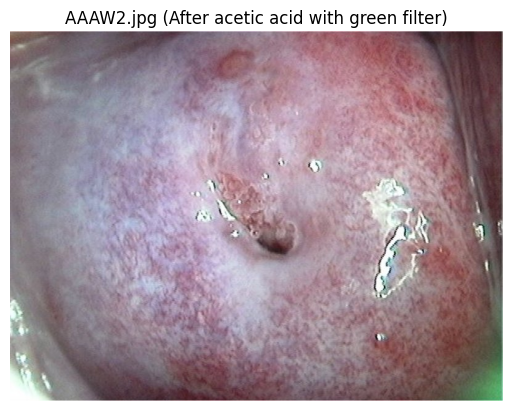

📸 AAAW3.jpg — Type: After acetic acid


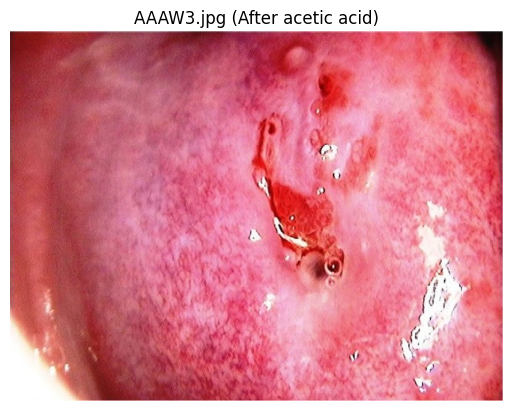

📸 AAAW4.jpg — Type: After Lugol’s iodine


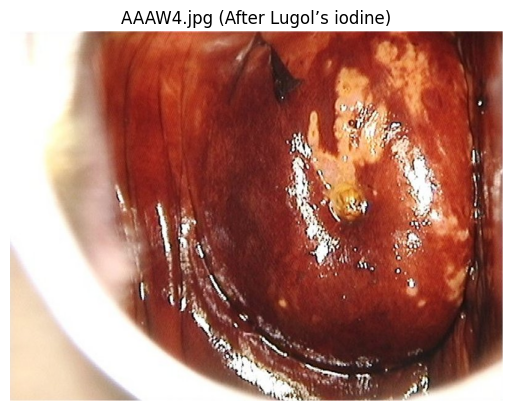

In [ ]:
display_case("Case 001")
